In [7]:
%matplotlib inline

![pymatgen](https://camo.qiitausercontent.com/0a13a0de0e197ddde92a8704ab970b151877937c/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3134363536352f37663331353836372d623236362d336136612d393964332d6338373238376562383332302e706e67)

periodic table模組提供了以下幾種類別
#  Element

In [8]:
import pymatgen.core as mg

symbol = "Si"
elm = mg.Element(symbol)
print(elm.atomic_mass)
print(elm.atomic_mass.to("kg"))
print(elm.atomic_radius)
print(elm.melting_point)
print(elm.ionic_radii)
elec_structure = elm.full_electronic_structure
print(elec_structure)

28.0855 amu
4.66370699549943e-26 kg
1.1 ang
1687.0 K
{4: 0.54}
[(1, 's', 2), (2, 's', 2), (2, 'p', 6), (3, 's', 2), (3, 'p', 2)]


# Specie

In [9]:
from pymatgen.core.periodic_table import Specie

fe2 = Specie("Fe", 2)
print(fe2.atomic_mass)
print(fe2.ionic_radius)
print(fe2.full_electronic_structure)
print(mg.Element("Fe").full_electronic_structure)

55.845 amu
0.92 ang
[(1, 's', 2), (2, 's', 2), (2, 'p', 6), (3, 's', 2), (3, 'p', 6), (3, 'd', 6), (4, 's', 2)]
[(1, 's', 2), (2, 's', 2), (2, 'p', 6), (3, 's', 2), (3, 'p', 6), (3, 'd', 6), (4, 's', 2)]


# Composition

In [10]:
from pymatgen.core.composition import Composition

comp = Composition("MoS2")
print("Weight of MoS2 is ", comp.weight)
print("Amount of Mo in MoS2 is ", comp["Mo"])
print("Atomic fraction of Mo is ", comp.get_atomic_fraction("Mo"))
print("Weight fraction of Mo is ", comp.get_wt_fraction("Mo"))

Weight of MoS2 is  160.07 amu
Amount of Mo in MoS2 is  1.0
Atomic fraction of Mo is  0.3333333333333333
Weight fraction of Mo is  0.5993627787842819 


# Lattice & Structure

In [11]:
from pymatgen.core.lattice import Lattice
from pymatgen.core.structure import Structure

# http://pymatgen.org/pymatgen.core.structure.html?highlight=structure#module-pymatgen.core.structure
lat1 = Lattice.cubic(4.2)
print(lat1.abc)
print(lat1.angles)
print(lat1.lengths)
#print("deprecated: ", lat1.lengths_and_angles)
print("New: ", lat1.parameters)

lat2 = Lattice.hexagonal(3.6,4.6)
print(lat2.lengths)

## Structure object represents a crystal structure (lattice + basis)
compound = Structure(lat1, ["Cs", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
print(compound.volume)

print("First site of the structure is ",compound[0])

(4.2, 4.2, 4.2)
(90.0, 90.0, 90.0)
(4.2, 4.2, 4.2)
New:  (4.2, 4.2, 4.2, 90.0, 90.0, 90.0)
(3.6, 3.6, 4.6)
74.08800000000001
First site of the structure is  [0. 0. 0.] Cs


In [13]:
from pymatgen.vis.structure_chemview import quick_view
# Visualization for structures using chemview. But chemview didn't support  windows platform.
# https://pymatgen.org/pymatgen.vis.structure_chemview.html
# https://chemview.readthedocs.io/en/latest/
import pymatgen.io.ase as aio
# This module provides conversion between the Atomic Simulation Environment Atoms object and pymatgen Structure objects.
# https://pymatgen.org/pymatgen.io.ase.html
from ase.visualize import view
#A simple viewer based on X3D is built into ASE, which should work on modern browsers without additional packages.
# https://wiki.fysik.dtu.dk/ase/dev/ase/visualize/visualize.html
# You can create a Structure using spacegroup symmetry as well.
li2o = Structure.from_spacegroup("Fm-3m", mg.Lattice.cubic(3), ["Li", "O"], [[0.25, 0.25, 0.25], [0, 0, 0]])

#quick_view(li2o)


li2o_ase=aio.AseAtomsAdaptor.get_atoms(li2o)
view(li2o_ase,viewer='x3d')

# Input/output

In [14]:
compound.to(fmt="poscar")
compound.to(filename="POSCAR")
compound.to(filename="CsCl.cif")

print(compound.to(fmt="poscar"))

print(compound.to(fmt="cif"))

li2o.to(filename="Li2O.cif")

Cs1 Cl1
1.0
4.200000 0.000000 0.000000
0.000000 4.200000 0.000000
0.000000 0.000000 4.200000
Cs Cl
1 1
direct
0.000000 0.000000 0.000000 Cs
0.500000 0.500000 0.500000 Cl

# generated using pymatgen
data_CsCl
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   4.20000000
_cell_length_b   4.20000000
_cell_length_c   4.20000000
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   CsCl
_chemical_formula_sum   'Cs1 Cl1'
_cell_volume   74.08800000
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Cs  Cs0  1  0.00000000  0.00000000  0.00000000  1
  Cl  Cl1  1  0.50000000  0.50000000  0.50000000  1



In [15]:
# Reading a structure is easy.
compound = Structure.from_file("CsCl.cif")
print(compound)

Full Formula (Cs1 Cl1)
Reduced Formula: CsCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Cs    0    0    0
  1  Cl    0.5  0.5  0.5


In [16]:
# Changing the specie of a site.
compound[1] = "F"
print(compound)

Full Formula (Cs1 F1)
Reduced Formula: CsF
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Cs    0    0    0
  1  F     0.5  0.5  0.5


In [17]:
# Changes species and coordinates (fractional assumed for structures)
compound[1] = "Cl", [0.51, 0.51, 0.51]
print(compound)

Full Formula (Cs1 Cl1)
Reduced Formula: CsCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Cs    0     0     0
  1  Cl    0.51  0.51  0.51


In [18]:
# Replaces all Cs in the structure with K
compound["Cs"] = "K"
print(compound)

Full Formula (K1 Cl1)
Reduced Formula: KCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  K     0     0     0
  1  Cl    0.51  0.51  0.51


In [19]:
# Replaces all K in the structure with K: 0.5, Na: 0.5, i.e., a disordered structure is created.
compound["K"] = "K0.5Na0.5"
print(compound)

Full Formula (K0.5 Na0.5 Cl1)
Reduced Formula: K0.5Na0.5Cl1
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP                    a     b     c
---  -----------------  ----  ----  ----
  0  K:0.500, Na:0.500  0     0     0
  1  Cl                 0.51  0.51  0.51


In [20]:
## http://pymatgen.org/modules.html

import pymatgen.core as mg

API_key="MTF9psiegrAP0BmZ"

# Material

In [21]:
## http://pymatgen.org/pymatgen.ext.matproj.html
from pymatgen.ext.matproj import MPRester
from pprint import pprint

with MPRester(API_key) as m:
    # Structure for material id
    id = "mp-1234"
    data = m.get_data(id)
    # The return object is list of dict
    pprint(data)

# The general format is as follows:
#[{“material_id”: material_id, “property_name” : value}, …]

[{'band_gap': 0.0,
  'cif': '# generated using pymatgen\n'
         'data_LuAl2\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.48873961\n'
         '_cell_length_b   5.48873961\n'
         '_cell_length_c   5.48873961\n'
         '_cell_angle_alpha   60.00000000\n'
         '_cell_angle_beta   60.00000000\n'
         '_cell_angle_gamma   60.00000000\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   LuAl2\n'
         "_chemical_formula_sum   'Lu2 Al4'\n"
         '_cell_volume   116.92379067\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_o

# Bandstructure

number of bands 96
True
False
band gap {'energy': 0.0, 'direct': False, 'transition': None}
{<Spin.up: 1>: array([[-20.7316, -20.7316, -20.7316, ..., -20.7741, -20.7741, -20.7741],
       [-20.7316, -20.7316, -20.7316, ..., -20.774 , -20.774 , -20.7741],
       [-20.7316, -20.7316, -20.7315, ..., -20.6452, -20.6451, -20.6451],
       ...,
       [ 40.9932,  40.9955,  41.0208, ...,  39.8673,  39.9075,  39.8902],
       [ 41.0159,  41.0727,  41.0661, ...,  40.4809,  40.475 ,  40.4701],
       [ 41.7458,  41.7134,  41.8969, ...,  40.4878,  40.4995,  40.4732]])}
(96, 534)
[3.1616 3.1541 3.1348 3.1088 3.0796 3.0489 3.0175 2.9858 2.9542 2.9227
 2.8916 2.8607 2.8303 2.8002 2.7706 2.7414 2.7128 2.6845 2.6568 2.6295
 2.6028 2.5765 2.5507 2.5254 2.5006 2.4763 2.4524 2.4291 2.4063 2.3839
 2.3621 2.3407 2.3198 2.2994 2.2795 2.26   2.2411 2.2226 2.2045 2.187
 2.1699 2.1533 2.1371 2.1214 2.1061 2.0913 2.077  2.0631 2.0496 2.0366
 2.024  2.0118 2.0001 1.9888 1.9779 1.9675 1.9575 1.9479 1.9387 1.9299


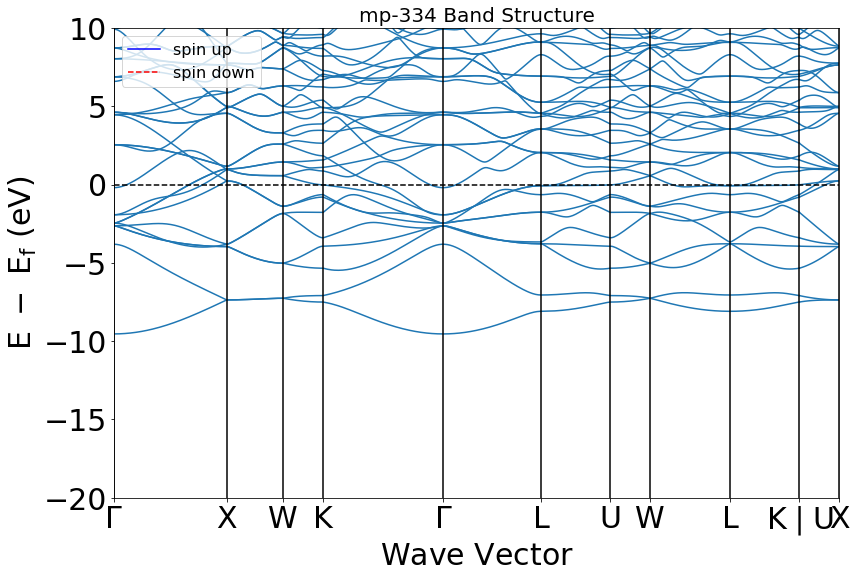

In [28]:
# http://pymatgen.org/pymatgen.electronic_structure.bandstructure.html
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.core import Spin
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter
import matplotlib.pyplot as plt

with MPRester(API_key) as m:
    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-1234")
    print(bandstructure)
    print("number of bands", bandstructure.nb_bands)
    print(bandstructure.is_metal())
    print(bandstructure.is_spin_polarized)
    print("band gap", bandstructure.get_band_gap())
    
    # BaandStructure物件有個bands的性質，儲存所有的能帶結構，他的shape是(dictionnary of arrays)
    # {Spin.up: np.array((nb_bands, nb_kpoints)), Spin.down: np.array((nb_bands, nb_kpoints))}
    print(bandstructure.bands)
    print(bandstructure.bands[Spin.up].shape)
    # The 9th bands of spin up
    print(bandstructure.bands[Spin.up][9, :])
    
    bsplot = BSPlotter(bandstructure)
    # get the plot
    bsplot.get_plot(ylim=(-20, 10), zero_to_efermi=True)
    print(bandstructure.efermi)
    # add some features
    ax = plt.gca()
    ax.set_title("mp-1234 Band Structure", fontsize=20)
    xlim = ax.get_xlim()
    ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

    # add legend
    ax.plot((), (), "b-", label="spin up")
    ax.plot((), (), "r--", label="spin down")
    ax.legend(fontsize=16, loc="upper left")

# Phase Diagram

In [30]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter

#This initializes the REST adaptor. Put your own API key in.

with MPRester(API_key) as m: 
#Entries are the basic unit for thermodynamic and other analyses in pymatgen.
#This gets all entries belonging to the chemical system.
    entries = m.get_entries_in_chemsys(['C', 'Ca', 'O'])
    #entries = m.get_entries_in_chemsys(['C', 'Si'])
    #print(entries)
#With entries, you can do many sophisticated analyses, 
#like creating phase diagrams.
    pd = PhaseDiagram(entries)
    plotter = PDPlotter(pd, show_unstable=True)
    plotter.show() 

## Handson

1. 使用MPRester類別中提供的其他方法(get_structures，get_bandstructure_by_material_id...)來抓取任意一筆資料。 

2. 畫出mp-1434的bandstructure，他的band_gap_energy為何?

3. 畫出Si-C system的相圖

4. 畫出Ca-C-O system的相圖

# Using pymatgen's MPRester high-level methods

* Formulae, e.g., "Li2O", "Fe2O3", "*TiO3
* Chemical systems, e.g., "Li-Fe-O", "*-Fe-O"
* Materials ids, e.g., "mp-1234"

In [ ]:
from pymatgen.ext.matproj import MPRester

with MPRester(API_key) as m:
    data = m.get_data("Li-Fe-O")
    print(len(data))
    pprint(data)

168
[{'band_gap': 0.042299999999999977,
  'cif': '# generated using pymatgen\n'
         'data_Li9(FeO4)2\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   6.47797509\n'
         '_cell_length_b   6.47797509\n'
         '_cell_length_c   4.69459555\n'
         '_cell_angle_alpha   89.71485303\n'
         '_cell_angle_beta   89.71485303\n'
         '_cell_angle_gamma   89.63994794\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li9(FeO4)2\n'
         "_chemical_formula_sum   'Li9 Fe2 O8'\n"
         '_cell_volume   196.99602575\n'
         '_cell_formula_units_Z   1\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_

         '_chemical_formula_structural   Li3FeO4\n'
         "_chemical_formula_sum   'Li3 Fe1 O4'\n"
         '_cell_volume   70.04649841\n'
         '_cell_formula_units_Z   1\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li0  1  0.00655200  0.99463800  0.00196100  1\n'
         '  Li  Li1  1  0.98672700  0.49313700  0.01060700  1\n'
         '  Li  Li2  1  0.50200900  0.99692800  0.49962000  1\n'
         '  Fe  Fe3  1  0.50451300  0.49235300  0.50603100  1\n'
         '  O  O4  1  0.27376200  0.99013600  0.23810300  1\n'
         '  O  O5  1  0.19171400  0.48899600  0.27936500  1\n'
         '  O  O6  1  0.73639400  0

         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li0  1  0.00000000  0.00000000  0.00000000  1\n'
         '  Fe  Fe1  1  0.50000000  0.50000000  0.50000000  1\n'
         '  Fe  Fe2  1  0.16579400  0.83420600  0.50000000  1\n'
         '  Fe  Fe3  1  0.83420600  0.16579400  0.50000000  1\n'
         '  O  O4  1  0.42068700  0.09375900  0.69905700  1\n'
         '  O  O5  1  0.09375900  0.42068700  0.69905700  1\n'
         '  O  O6  1  0.78175900  0.78175900  0.71118600  1\n'
         '  O  O7  1  0.57931300  0.90624100  0.30094300  1\n'
         '  O  O8  1  0.21824100  0.21824100  0.28881400  1\n'
         '  O  O9  1  0.90624100  0.57931300  0.30094300  1\n',
  'density': 3.849007992383114,
  'deprecated': False,
  'diel': None,
  'e_above_hull': 0.14041063105000262,
  'elasticity': None,
  'elements': ['F

         '  O  O13  1  0.51781800  0.03413300  0.64199500  1\n'
         '  O  O14  1  0.68458400  0.36612200  0.89361200  1\n'
         '  O  O15  1  0.97940400  0.95840800  0.71602200  1\n'
         '  O  O16  1  0.99182800  0.99215300  0.19619200  1\n'
         '  O  O17  1  0.33363800  0.15265700  0.40803800  1\n'
         '  O  O18  1  0.95233100  0.48320700  0.64423200  1\n'
         '  O  O19  1  0.52816300  0.48145000  0.64652600  1\n'
         '  O  O20  1  0.17321200  0.34624800  0.92285100  1\n'
         '  O  O21  1  0.83050500  0.68638400  0.39400500  1\n'
         '  O  O22  1  0.50698100  0.54943000  0.15392200  1\n'
         '  O  O23  1  0.04746000  0.55392500  0.15308700  1\n'
         '  O  O24  1  0.35278300  0.69634500  0.38815200  1\n'
         '  O  O25  1  0.64548000  0.80069900  0.89981400  1\n'
         '  O  O26  1  0.49497600  0.96738800  0.15570900  1\n'
         '  O  O27  1  0.15578200  0.80195100  0.90074300  1\n',
  'density': 3.4409850143658227,
  'dep

                 'source': 'spglib',
                 'symbol': 'Pbca',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-807464',
               'mp-816473',
               'mp-779889',
               'mp-1330162',
               'mp-1896940',
               'mp-817263'],
  'total_magnetization': 5.01254465,
  'unit_cell_formula': {'Fe': 8.0, 'Li': 40.0, 'O': 32.0},
  'volume': 822.0454392368943},
 {'band_gap': 0.3675999999999995,
  'cif': '# generated using pymatgen\n'
         'data_Li5Fe11O16\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   6.04228000\n'
         '_cell_length_b   6.06178450\n'
         '_cell_length_c   10.34278076\n'
         '_cell_angle_alpha   74.03101492\n'
         '_cell_angle_beta   74.00100702\n'
         '_cell_angle_gamma   60.51765124\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li5Fe11O16\n'
         "_chemical_formula_sum   'Li5 Fe11 O16'\n"
         '_cell_

         '  O  O24  1  0.91115300  0.73372000  0.85755200  1\n'
         '  O  O25  1  0.83489200  0.27075000  0.87800100  1\n'
         '  O  O26  1  0.88965400  0.96181300  0.37558300  1\n'
         '  O  O27  1  0.89533400  0.53686000  0.36475300  1\n'
         '  O  O28  1  0.64882600  0.76395600  0.61461900  1\n'
         '  O  O29  1  0.58516800  0.22601400  0.64546100  1\n'
         '  O  O30  1  0.64096000  0.02753400  0.11002400  1\n'
         '  O  O31  1  0.62599700  0.47353300  0.11464800  1\n'
         '  O  O32  1  0.37988700  0.53198400  0.87583400  1\n'
         '  O  O33  1  0.40561600  0.96574200  0.87878800  1\n'
         '  O  O34  1  0.39690700  0.74516500  0.36312900  1\n'
         '  O  O35  1  0.29907400  0.25170000  0.39339500  1\n'
         '  O  O36  1  0.15794800  0.47345500  0.62916200  1\n'
         '  O  O37  1  0.11934100  0.02112700  0.61542500  1\n'
         '  O  O38  1  0.14636000  0.75278300  0.11410300  1\n'
         '  O  O39  1  0.09468900  0.249

                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-771531',
               'mp-803739',
               'mp-812073',
               'mp-756856',
               'mp-886348',
               'mp-1376453',
               'mp-1934383',
               'mp-812843'],
  'total_magnetization': 32.9998464,
  'unit_cell_formula': {'Fe': 7.0, 'Li': 5.0, 'O': 12.0},
  'volume': 227.07934423923032},
 {'band_gap': 0.019299999999999984,
  'cif': '# generated using pymatgen\n'
         'data_Li15(FeO6)2\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.44830300\n'
         '_cell_length_b   5.82502089\n'
         '_cell_length_c   8.09213193\n'
         '_cell_angle_alpha   86.08709979\n'
         '_cell_angle_beta   89.14808659\n'
         '_cell_angle_gamma   89.56111653\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li15(FeO6)2\n'
         "_chemical_formula_sum   'Li15 Fe2 O12'\n"
         '_cell_volume   256.

  'density': 4.503496840583243,
  'deprecated': False,
  'diel': None,
  'e_above_hull': 0.10733880420454422,
  'elasticity': None,
  'elements': ['Fe', 'Li', 'O'],
  'energy': -138.40514994,
  'energy_per_atom': -6.291143179090909,
  'formation_energy_per_atom': -1.7294904604545456,
  'full_formula': 'Li3Fe7O12',
  'hubbards': {'Fe': 5.3, 'Li': 0.0, 'O': 0.0},
  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-752897',
  'nelements': 3,
  'nsites': 22,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li3Fe7O12',
  'spacegroup': {'crystal_system': 'monoclinic',
                 'hall': 'C 2y',
                 'number': 5,
                 'point_group': '2',
                 'source': 'spglib',
                 'symbol': 'C2',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-797308',
               'mp-762465',
               'mp-798106',
               'mp-752897',
               'mp-880362',
      

                 'K_Reuss': 98.0,
                 'K_VRH': 99.0,
                 'K_Voigt': 100.0,
                 'K_Voigt_Reuss_Hill': 99.0,
                 'compliance_tensor': [[5.613589849461256,
                                        -0.5803065276196944,
                                        -0.761816440753736,
                                        0.0,
                                        -0.1264948018791818,
                                        0.0],
                                       [-0.580306527619694,
                                        5.131518910062241,
                                        -1.4761522620334147,
                                        0.0,
                                        -1.9383960354049827,
                                        0.0],
                                       [-0.7618164407537363,
                                        -1.4761522620334144,
                                        5.105719388798414,
         

  'energy_per_atom': -5.650853137575758,
  'formation_energy_per_atom': -1.6762575439393934,
  'full_formula': 'Li18Fe12O36',
  'hubbards': {'Fe': 5.3, 'Li': 0.0, 'O': 0.0},
  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-760809',
  'nelements': 3,
  'nsites': 66,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li3(FeO3)2',
  'spacegroup': {'crystal_system': 'monoclinic',
                 'hall': '-C 2yc',
                 'number': 15,
                 'point_group': '2/m',
                 'source': 'spglib',
                 'symbol': 'C2/c',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-765423',
               'mp-881638',
               'mp-896107',
               'mp-760809',
               'mp-881647',
               'mp-1325844',
               'mp-1885067'],
  'total_magnetization': 7.0,
  'unit_cell_formula': {'Fe': 12.0, 'Li': 18.0, 'O': 36.0},
  'volume': 646.358926573343},
 {'band_

  'cif': '# generated using pymatgen\n'
         'data_Li3(FeO3)2\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   4.94352800\n'
         '_cell_length_b   4.96100900\n'
         '_cell_length_c   8.37632700\n'
         '_cell_angle_alpha   90.00000000\n'
         '_cell_angle_beta   90.00000000\n'
         '_cell_angle_gamma   90.00000000\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li3(FeO3)2\n'
         "_chemical_formula_sum   'Li6 Fe4 O12'\n"
         '_cell_volume   205.42847231\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupa

  'energy': -258.78137893,
  'energy_per_atom': -5.881394975681818,
  'formation_energy_per_atom': -1.7111136737121213,
  'full_formula': 'Li10Fe10O24',
  'hubbards': {'Fe': 5.3, 'Li': 0.0, 'O': 0.0},
  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-759022',
  'nelements': 3,
  'nsites': 44,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li5Fe5O12',
  'spacegroup': {'crystal_system': 'triclinic',
                 'hall': 'P 1',
                 'number': 1,
                 'point_group': '1',
                 'source': 'spglib',
                 'symbol': 'P1',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-762602',
               'mp-880347',
               'mp-894320',
               'mp-759022',
               'mp-880348',
               'mp-1356228',
               'mp-1770534',
               'mp-1821240'],
  'total_magnetization': 20.9993683,
  'unit_cell_formula': {'Fe': 10.0, 'Li': 10.0

         '_cell_angle_alpha   98.10229449\n'
         '_cell_angle_beta   104.15507179\n'
         '_cell_angle_gamma   104.88223731\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li2Fe3O10\n'
         "_chemical_formula_sum   'Li2 Fe3 O10'\n"
         '_cell_volume   177.94387864\n'
         '_cell_formula_units_Z   1\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li0  1  0.32272100  0.75773000  0.40452500  1\n'
         '  Li  Li1  1  0.67727900  0.24227000  0.59547500  1\n'
         '  Fe  Fe2  1  0.00000000  0.50000000  0.00000000  1\n'
         '  Fe  Fe3  1  0.67753500  0.878

  'volume': 417.9206613437442},
 {'band_gap': 0.0,
  'cif': '# generated using pymatgen\n'
         'data_Li3FeO4\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.02390408\n'
         '_cell_length_b   10.20119917\n'
         '_cell_length_c   9.77647627\n'
         '_cell_angle_alpha   16.45387831\n'
         '_cell_angle_beta   29.31319795\n'
         '_cell_angle_gamma   33.23079839\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li3FeO4\n'
         "_chemical_formula_sum   'Li3 Fe1 O4'\n"
         '_cell_volume   69.48016048\n'
         '_cell_formula_units_Z   1\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_

  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-759394',
  'nelements': 3,
  'nsites': 24,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li2FeO3',
  'spacegroup': {'crystal_system': 'orthorhombic',
                 'hall': '-P 2a 2bc',
                 'number': 52,
                 'point_group': 'mmm',
                 'source': 'spglib',
                 'symbol': 'Pnna',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-764638',
               'mp-897916',
               'mp-882749',
               'mp-759394',
               'mp-882748',
               'mp-1376647',
               'mp-1834323',
               'mp-898586'],
  'total_magnetization': 4.00006425,
  'unit_cell_formula': {'Fe': 4.0, 'Li': 8.0, 'O': 12.0},
  'volume': 214.12115051822718},
 {'band_gap': 0.1331,
  'cif': '# generated using pymatgen\n'
         'data_Li4Fe3O8\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_

         '  O  O20  1  0.51305900  0.34395100  0.80726300  1\n'
         '  O  O21  1  0.01317300  0.84395800  0.30730100  1\n'
         '  O  O22  1  0.48688400  0.65604400  0.19272100  1\n'
         '  O  O23  1  0.98681800  0.15604800  0.69273800  1\n'
         '  O  O24  1  0.46494500  0.26418000  0.14902000  1\n'
         '  O  O25  1  0.96492700  0.76418300  0.64907800  1\n'
         '  O  O26  1  0.53512000  0.73581600  0.85091200  1\n'
         '  O  O27  1  0.03512100  0.23581900  0.35090300  1\n'
         '  O  O28  1  0.76042100  0.05857400  0.05228300  1\n'
         '  O  O29  1  0.26046200  0.55857900  0.55228000  1\n'
         '  O  O30  1  0.23955200  0.94142000  0.94774100  1\n'
         '  O  O31  1  0.73953600  0.44139300  0.44773500  1\n'
         '  O  O32  1  0.99833800  0.40142000  0.90239300  1\n'
         '  O  O33  1  0.49838100  0.90140900  0.40240200  1\n'
         '  O  O34  1  0.00171400  0.59861200  0.09760100  1\n'
         '  O  O35  1  0.50165500  0.098

         '  O  O57  1  0.94352700  0.59645000  0.22422100  1\n'
         '  O  O58  1  0.72054600  0.54617400  0.44905400  1\n'
         '  O  O59  1  0.94109100  0.27331000  0.90923000  1\n'
         '  O  O60  1  0.32769100  0.74829400  0.93663200  1\n'
         '  O  O61  1  0.55890900  0.77331000  0.90923000  1\n',
  'density': 2.5354417316284814,
  'deprecated': False,
  'diel': None,
  'e_above_hull': 0.0972940683266117,
  'elasticity': None,
  'elements': ['Fe', 'Li', 'O'],
  'energy': -334.39734259,
  'energy_per_atom': -5.393505525645161,
  'formation_energy_per_atom': -1.9427491708602147,
  'full_formula': 'Li28Fe8O26',
  'hubbards': {'Fe': 5.3, 'Li': 0.0, 'O': 0.0},
  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-781016',
  'nelements': 3,
  'nsites': 62,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li14Fe4O13',
  'spacegroup': {'crystal_system': 'monoclinic',
                 'hall': '-P 2ybc',
     

  'is_hubbard': True,
  'material_id': 'mp-756941',
  'nelements': 3,
  'nsites': 20,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'LiFeO3',
  'spacegroup': {'crystal_system': 'orthorhombic',
                 'hall': '-P 2a 2bc',
                 'number': 52,
                 'point_group': 'mmm',
                 'source': 'spglib',
                 'symbol': 'Pnna',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-771612',
               'mp-886310',
               'mp-900747',
               'mp-756941',
               'mp-886319',
               'mp-1346389',
               'mp-1789189',
               'mp-901511'],
  'total_magnetization': 3.02050675,
  'unit_cell_formula': {'Fe': 4.0, 'Li': 4.0, 'O': 12.0},
  'volume': 197.85461430432758},
 {'band_gap': 0.0,
  'cif': '# generated using pymatgen\n'
         'data_Li3FeO4\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.97652169\n'
         '_cell_length_b   7.6

                 'compliance_tensor': [[5.5, -1.9, -0.6, -3.8, 0.0, 0.0],
                                       [-1.9, 5.5, -0.6, 3.8, -0.0, 0.0],
                                       [-0.6, -0.6, 6.2, 0.0, -0.0, -0.0],
                                       [-3.8, 3.8, 0.0, 62.3, 0.0, -0.0],
                                       [-0.0, -0.0, -0.0, 0.0, 62.3, -7.5],
                                       [0.0, 0.0, -0.0, -0.0, -7.5, 14.8]],
                 'elastic_anisotropy': 3.8,
                 'elastic_tensor': [[217.0, 73.0, 29.0, 9.0, 0.0, 0.0],
                                    [73.0, 217.0, 29.0, -9.0, 0.0, 0.0],
                                    [29.0, 29.0, 167.0, 0.0, 0.0, 0.0],
                                    [9.0, -9.0, 0.0, 17.0, 0.0, 0.0],
                                    [0.0, 0.0, 0.0, 0.0, 17.0, 9.0],
                                    [0.0, 0.0, 0.0, 0.0, 9.0, 72.0]],
                 'elastic_tensor_original': [[217.5128751890131,
                

 {'band_gap': 0.14079999999999981,
  'cif': '# generated using pymatgen\n'
         'data_Li3(FeO3)2\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.07421683\n'
         '_cell_length_b   5.07253627\n'
         '_cell_length_c   9.66710440\n'
         '_cell_angle_alpha   85.11448498\n'
         '_cell_angle_beta   85.11572601\n'
         '_cell_angle_gamma   120.37238522\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li3(FeO3)2\n'
         "_chemical_formula_sum   'Li6 Fe4 O12'\n"
         '_cell_volume   211.50181262\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fra

  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-1663732',
  'nelements': 3,
  'nsites': 28,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li3FeO3',
  'spacegroup': {'crystal_system': 'orthorhombic',
                 'hall': '-C 2 2',
                 'number': 65,
                 'point_group': 'mmm',
                 'source': 'spglib',
                 'symbol': 'Cmmm',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-1663732', 'mp-1809349'],
  'total_magnetization': 3.000000175,
  'unit_cell_formula': {'Fe': 4.0, 'Li': 12.0, 'O': 12.0},
  'volume': 290.29575690844734},
 {'band_gap': 0.0,
  'cif': '# generated using pymatgen\n'
         'data_LiFeO3\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.79940734\n'
         '_cell_length_b   5.79940734\n'
         '_cell_length_c   6.19466001\n'
         '_cell_angle_alpha   72.88444898\n'
         '_cell_angle_beta   72.88444898\n'
         '_cell_a

         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li0  1  0.14465300  0.64465300  0.75000000  1\n'
         '  Li  Li1  1  0.35534700  0.85534700  0.25000000  1\n'
         '  Li  Li2  1  0.64465300  0.14465300  0.75000000  1\n'
         '  Li  Li3  1  0.85534700  0.35534700  0.25000000  1\n'
         '  Fe  Fe4  1  0.00000000  0.00000000  0.00000000  1\n'
         '  Fe  Fe5  1  0.50000000  0.50000000  0.50000000  1\n'
         '  Fe  Fe6  1  0.33475600  0.66524400  0.00000000  1\n'
         '  Fe  Fe7  1  0.83475600  0.16524400  0.50000000  1\n'
         '  Fe  Fe8  1  0.16524400  0.83475600  0.50000000  1\n'
         '  Fe  F

 {'band_gap': 0.0,
  'cif': '# generated using pymatgen\n'
         'data_Li4(FeO2)9\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   9.24308658\n'
         '_cell_length_b   24.86314734\n'
         '_cell_length_c   2.94812200\n'
         '_cell_angle_alpha   90.00040425\n'
         '_cell_angle_beta   90.00011472\n'
         '_cell_angle_gamma   89.62035299\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li4(FeO2)9\n'
         "_chemical_formula_sum   'Li8 Fe18 O36'\n"
         '_cell_volume   677.49959924\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
       

         '  Fe  Fe5  1  0.50000000  0.50000000  0.00000000  1\n'
         '  Fe  Fe6  1  0.50000000  0.00000000  0.50000000  1\n'
         '  Fe  Fe7  1  0.00000000  0.00000000  0.50000000  1\n'
         '  O  O8  1  0.75788300  0.26096700  0.99755000  1\n'
         '  O  O9  1  0.72220200  0.73466300  0.02064200  1\n'
         '  O  O10  1  0.26096700  0.75788300  0.49755000  1\n'
         '  O  O11  1  0.26533700  0.27779800  0.47935800  1\n'
         '  O  O12  1  0.73466300  0.72220200  0.52064200  1\n'
         '  O  O13  1  0.73903300  0.24211700  0.50245000  1\n'
         '  O  O14  1  0.27779800  0.26533700  0.97935800  1\n'
         '  O  O15  1  0.24211700  0.73903300  0.00245000  1\n',
  'density': 4.993785034630602,
  'deprecated': False,
  'diel': None,
  'e_above_hull': 0.03932430218750049,
  'elasticity': None,
  'elements': ['Fe', 'Li', 'O'],
  'energy': -101.97212128,
  'energy_per_atom': -6.37325758,
  'formation_energy_per_atom': -1.673908550416666,
  'full_formula':

# Using pymatgen's MPRester query method

The way to use query is

`query(criteria, properties)`

In [24]:
from pymatgen.ext.matproj import MPRester

with MPRester(API_key) as m:
    # Get all energies of materials with formula "*2O".
    results = m.query("*2O", ['energy'])
    print(len(results))
    
    # Get the formulas and energies of materials with materials_id mp-1234.
    results = m.query("mp-1234", ['pretty_formula', 'energy'])
    print(results)

    # Get all compounds of the form ABO3
    results = m.query("**O3", ['pretty_formula', 'energy'])
    print(len(results))

c:\Users\ac_ya\.conda\envs\py39-tf2-gpu\lib\site-packages\pymatgen\core\periodic_table.py:210: UserWarning:

No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

c:\Users\ac_ya\.conda\envs\py39-tf2-gpu\lib\site-packages\pymatgen\core\periodic_table.py:210: UserWarning:

No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

c:\Users\ac_ya\.conda\envs\py39-tf2-gpu\lib\site-packages\pymatgen\core\periodic_table.py:210: UserWarning:

No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

c:\Users\ac_ya\.conda\envs\py39-tf2-gpu\lib\site-packages\pymatgen\core\periodic_table.py:210: UserWarning:

No electronegativity for Rf. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused 

85
[{'pretty_formula': 'LuAl2', 'energy': -26.91801468}]


100%|██████████| 2398/2398 [00:06<00:00, 373.23it/s]

2398


In [25]:
# Fetch task_id, pretty_formula, elasticity for all materials with elasticity
from pymatgen.ext.matproj import MPRester

with MPRester(API_key) as m:
    elastic_data = m.query(criteria={"elasticity": {"$exists": True}}, 
                           properties=["task_id", "pretty_formula", "elasticity"])
    print(len(elastic_data))

100%|██████████| 13172/13172 [00:19<00:00, 678.22it/s]

13172


In [26]:
#Get material_ids ids for everything in the Materials Project database
from pymatgen.ext.matproj import MPRester

with MPRester(API_key) as m:
    data = m.query(criteria={}, properties=["task_id"])
    print(len(data))

100%|██████████| 126335/126335 [01:37<00:00, 1291.55it/s]

126335


In [27]:
# Get the energy for materials with material_ids "mp-1234" and "mp-2345".
from pymatgen.ext.matproj import MPRester

with MPRester(API_key) as m:
    data = m.query(criteria={"task_id": {"$in": ["mp-1234", "mp-2345"]}}, properties=["final_energy"])
    pprint(data)

[{'final_energy': -26.91801468}, {'final_energy': -336.35890376}]


In [ ]:
# Get the spacegroup symbol for all materials with formula Li2O.
from pymatgen.ext.matproj import MPRester

with MPRester(API_key) as m:
    data = m.query(criteria={"pretty_formula": "Li2O"}, properties=["spacegroup.symbol"])
    pprint(data)

[{'spacegroup.symbol': 'P1'},
 {'spacegroup.symbol': 'P1'},
 {'spacegroup.symbol': 'Fm-3m'},
 {'spacegroup.symbol': 'Pnma'},
 {'spacegroup.symbol': 'P1'},
 {'spacegroup.symbol': 'P1'}]


In [ ]:
# Get the ICSD of all compounds containing either K, Li or Na with O.
from pymatgen.ext.matproj import MPRester

with MPRester(API_key) as m:
    data = m.query(criteria={"elements": {"$in": ["K", "Li", "Na"], "$all": ["O"]}, "nelements": 2}, 
                   properties=["icsd_id", "pretty_formula", "spacegroup.symbol"])
    pprint(data)


[{'icsd_id': None, 'pretty_formula': 'Na2O2', 'spacegroup.symbol': 'Cmcm'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'P4/mmm'},
 {'icsd_id': None, 'pretty_formula': 'NaO2', 'spacegroup.symbol': 'Pnnm'},
 {'icsd_id': None, 'pretty_formula': 'KO2', 'spacegroup.symbol': 'I4/mmm'},
 {'icsd_id': None, 'pretty_formula': 'Na2O', 'spacegroup.symbol': 'Pnnm'},
 {'icsd_id': None, 'pretty_formula': 'Na2O2', 'spacegroup.symbol': 'R-3m'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'P2_1'},
 {'icsd_id': None, 'pretty_formula': 'NaO2', 'spacegroup.symbol': 'Pbca'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'I4_1/amd'},
 {'icsd_id': None, 'pretty_formula': 'Li2O', 'spacegroup.symbol': 'P1'},
 {'icsd_id': None, 'pretty_formula': 'LiO2', 'spacegroup.symbol': 'C2/m'},
 {'icsd_id': None, 'pretty_formula': 'Na2O', 'spacegroup.symbol': 'P1'},
 {'icsd_id': None, 'pretty_formula': 'NaO2', 'spacegroup.symbol': 'Pbca'},
 {'icsd_id': None, 'pre

## Handson

1. 找出所有的鹼金族氮化物(Find all nitrides of alkali metals)的material_id以及pretty_formula

2. 在以上結果中挑出formation_energy_per_atom大於0.5的資料。

In [ ]:
from pymatgen.ext.matproj import MPRester
from pprint import pprint

with MPRester(API_key) as m:
    data = m.query('{Li,Na,K,Rb,Cs}-N', ['material_id', 'pretty_formula', 'formation_energy_per_atom'])
    print(len(data))
    pprint(data)

46
[{'formation_energy_per_atom': 0.24528330568965492,
  'material_id': 'mp-1104441',
  'pretty_formula': 'CsN2'},
 {'formation_energy_per_atom': -0.41812331698275784,
  'material_id': 'mp-510557',
  'pretty_formula': 'CsN3'},
 {'formation_energy_per_atom': 1.2554001585344827,
  'material_id': 'mp-1059879',
  'pretty_formula': 'CsN'},
 {'formation_energy_per_atom': -0.40682837573275865,
  'material_id': 'mp-1225892',
  'pretty_formula': 'CsN3'},
 {'formation_energy_per_atom': 1.1854568935000005,
  'material_id': 'mp-1064647',
  'pretty_formula': 'KN'},
 {'formation_energy_per_atom': -0.41784005449999917,
  'material_id': 'mp-827',
  'pretty_formula': 'KN3'},
 {'formation_energy_per_atom': -0.330864374333333,
  'material_id': 'mp-1206884',
  'pretty_formula': 'KN2'},
 {'formation_energy_per_atom': 0.39483681650000024,
  'material_id': 'mp-11801',
  'pretty_formula': 'K3N'},
 {'formation_energy_per_atom': 0.8579188773333334,
  'material_id': 'mp-1180757',
  'pretty_formula': 'KN2'},
 {'f

In [ ]:
from pymatgen.ext.matproj import MPRester
from pprint import pprint

with MPRester(API_key) as m:
    # Find all nitrides of alkali metals
    alkali_metals = ['Li', 'Na', 'K', 'Rb', 'Cs']
    criteria={"elements":{"$in":alkali_metals, "$all": ["N"]}, "nelements":2,"formation_energy_per_atom":{"$gt":0.5}}
    properties=['material_id', 'pretty_formula', 'formation_energy_per_atom']
    data = m.query(criteria, properties)
    print(len(data))
    pprint(data)


20
[{'formation_energy_per_atom': 0.5943723646120693,
  'material_id': 'mp-1064272',
  'pretty_formula': 'NaN3'},
 {'formation_energy_per_atom': 0.6191370792500006,
  'material_id': 'mp-636056',
  'pretty_formula': 'KN3'},
 {'formation_energy_per_atom': 0.6446428146120695,
  'material_id': 'mp-1065265',
  'pretty_formula': 'NaN3'},
 {'formation_energy_per_atom': 0.7915378040000002,
  'material_id': 'mp-1071868',
  'pretty_formula': 'KN2'},
 {'formation_energy_per_atom': 0.8414190021120698,
  'material_id': 'mp-22777',
  'pretty_formula': 'NaN3'},
 {'formation_energy_per_atom': 0.8579188773333334,
  'material_id': 'mp-1180757',
  'pretty_formula': 'KN2'},
 {'formation_energy_per_atom': 1.000883500833333,
  'material_id': 'mp-1059612',
  'pretty_formula': 'LiN'},
 {'formation_energy_per_atom': 1.0009029608333329,
  'material_id': 'mp-1180489',
  'pretty_formula': 'LiN'},
 {'formation_energy_per_atom': 1.098931549224138,
  'material_id': 'mp-1009221',
  'pretty_formula': 'NaN'},
 {'format

# save request result to file

In [ ]:
from pymatgen.ext.matproj import MPRester
from pprint import pprint
import json
import csv

with MPRester(API_key) as m:
    # Structure for material id
    id = "mp-1234"
    data = m.get_data(id)

    with open(id + '.csv', 'w') as f:
        f_csv = csv.DictWriter(f,data[0].keys())
        f_csv.writeheader()
        f_csv.writerows(data)
        
    with open(id + '.json', 'w') as f:
        json.dump(data, f)


# Manipulate data with Pandas DataFrame

In [ ]:
# Load data into Pandas DataFrame object 
from pymatgen.ext.matproj import MPRester
import pandas as pd

with MPRester(API_key) as m:
    data = m.get_data("*3O4")
    df = pd.DataFrame(data)
    pprint(df)

        energy  energy_per_atom      volume  formation_energy_per_atom  \
0   -56.765561        -4.054683  196.382570                  -0.405895   
1   -84.699580        -6.049970  146.742205                  -1.270713   
2   -84.978204        -6.069872  148.195047                  -1.290615   
3   -83.866350        -5.990454  146.742205                  -1.211197   
4   -85.124923        -6.080352  144.750038                  -1.301095   
5  -110.178328        -7.869881  156.569200                  -2.154740   
6  -110.404830        -7.886059  156.287233                  -2.170918   
7   -69.856803        -4.989772  183.414863                  -0.798134   
8   -70.393359        -5.028097  159.106701                  -0.836459   
9  -281.767036       -10.063108  434.609385                  -3.217398   
10  -94.185977        -6.727570  155.341199                  -1.629588   
11 -374.294254        -6.683826  633.120471                  -1.585845   
12  -92.888373        -6.634884  144.4

In [ ]:
print(df.shape)    #這個 DataFrame 有幾列有幾欄
print("---")  
print(df.info())  #關於 DataFrame 的詳細資訊
print("---")  
print(df.columns) #這個 DataFrame 的變數資訊
print("---")  
print(df.index)  #這個 DataFrame 的列索引資訊

(58, 29)
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 29 columns):
energy                       58 non-null float64
energy_per_atom              58 non-null float64
volume                       58 non-null float64
formation_energy_per_atom    58 non-null float64
nsites                       58 non-null int64
unit_cell_formula            58 non-null object
pretty_formula               58 non-null object
is_hubbard                   58 non-null bool
elements                     58 non-null object
nelements                    58 non-null int64
e_above_hull                 58 non-null float64
hubbards                     58 non-null object
is_compatible                58 non-null bool
spacegroup                   58 non-null object
task_ids                     58 non-null object
band_gap                     58 non-null float64
density                      58 non-null float64
icsd_id                      0 non-null object
icsd_ids            

可以透過下列方法選擇元素

* 用. 將key當作屬性選擇

In [ ]:
print(df.pretty_formula)

0     Ag3O4
1     Co3O4
2     Co3O4
3     Co3O4
4     Co3O4
5     Cr3O4
6     Cr3O4
7     Cu3O4
8     Cu3O4
9     Eu3O4
10    Fe3O4
11    Fe3O4
12    Fe3O4
13    Fe3O4
14    Fe3O4
15    Fe3O4
16    Fe3O4
17    Fe3O4
18    Fe3O4
19    Fe3O4
20    Fe3O4
21    Fe3O4
22    Fe3O4
23    Fe3O4
24    Fe3O4
25    Fe3O4
26    Fe3O4
27    Fe3O4
28    Fe3O4
29    Fe3O4
30    Fe3O4
31    Fe3O4
32    Fe3O4
33    Fe3O4
34    Fe3O4
35    Fe3O4
36    Fe3O4
37    Fe3O4
38    Mn3O4
39    Mn3O4
40    Mn3O4
41    Mn3O4
42    Mn3O4
43    Mn3O4
44    Mn3O4
45    Mn3O4
46    Ni3O4
47    Ni3O4
48    Pb3O4
49    Pb3O4
50    Pb3O4
51    Pt3O4
52    Pt3O4
53    Sn3O4
54    Sn3O4
55    Ti3O4
56    Ti3O4
57    Yb3O4
Name: pretty_formula, dtype: object


* 中括號 [] 選擇元素

In [ ]:
print(df[["material_id", "pretty_formula", "band_gap", "density"]])

   material_id pretty_formula  band_gap    density
0      mp-1605          Ag3O4    0.0000   6.554844
1   mp-1289702          Co3O4    1.3498   5.449736
2     mp-18748          Co3O4    0.0000   5.396309
3   mp-1285798          Co3O4    0.0000   5.449736
4   mp-1293627          Co3O4    1.4652   5.524740
5   mp-1322486          Cr3O4    1.4760   4.666246
6    mp-756253          Cr3O4    1.1329   4.674664
7   mp-1147673          Cu3O4    0.0000   4.610666
8   mp-1178476          Cu3O4    0.0000   5.315079
9   mp-1182716          Eu3O4    0.0000   7.945498
10    mp-19306          Fe3O4    0.0001   4.949993
11   mp-650112          Fe3O4    0.9248   4.858082
12    mp-18731          Fe3O4    0.7722   5.323013
13   mp-505595          Fe3O4    0.3681   4.851911
14   mp-611817          Fe3O4    0.0000   4.085446
15  mp-1104628          Fe3O4    0.0000   3.244354
16  mp-1277436          Fe3O4    1.4124   4.895510
17  mp-1181546          Fe3O4    0.0000   4.845771
18  mp-1182229          Fe3O4  

* .loc .iloc 方法選擇

In [ ]:
print(df.iloc[0, 27])

False


* 使用布林值篩選

In [ ]:
print(df[["material_id", "pretty_formula", "band_gap", "density"]][df.loc[:,"band_gap"] > 0.0])

   material_id pretty_formula  band_gap   density
1   mp-1289702          Co3O4    1.3498  5.449736
4   mp-1293627          Co3O4    1.4652  5.524740
5   mp-1322486          Cr3O4    1.4760  4.666246
6    mp-756253          Cr3O4    1.1329  4.674664
10    mp-19306          Fe3O4    0.0001  4.949993
11   mp-650112          Fe3O4    0.9248  4.858082
12    mp-18731          Fe3O4    0.7722  5.323013
13   mp-505595          Fe3O4    0.3681  4.851911
16  mp-1277436          Fe3O4    1.4124  4.895510
18  mp-1182229          Fe3O4    0.8246  4.881523
19  mp-1181340          Fe3O4    1.1692  4.844984
21  mp-1181570          Fe3O4    0.3251  5.316617
22  mp-1291630          Fe3O4    0.8733  4.873159
24   mp-715558          Fe3O4    0.0057  4.912613
25   mp-715275          Fe3O4    0.5975  5.308685
26  mp-1181813          Fe3O4    0.9524  4.797830
28   mp-715438          Fe3O4    0.7921  5.356415
29   mp-705416          Fe3O4    0.9833  4.863683
31  mp-1185276          Fe3O4    0.6370  4.835404


## save DataFrame to csv

In [ ]:
df[["material_id", "pretty_formula", "band_gap", "density"]][df.loc[:,"band_gap"] > 0.0].to_csv("band_gap_gt_zero.csv", index = False)

## save DataFrame to json

In [ ]:
df[["material_id", "pretty_formula", "band_gap", "density"]][df.loc[:,"band_gap"] > 0.0].to_json("band_gap_gt_zero.json", orient='index')

3


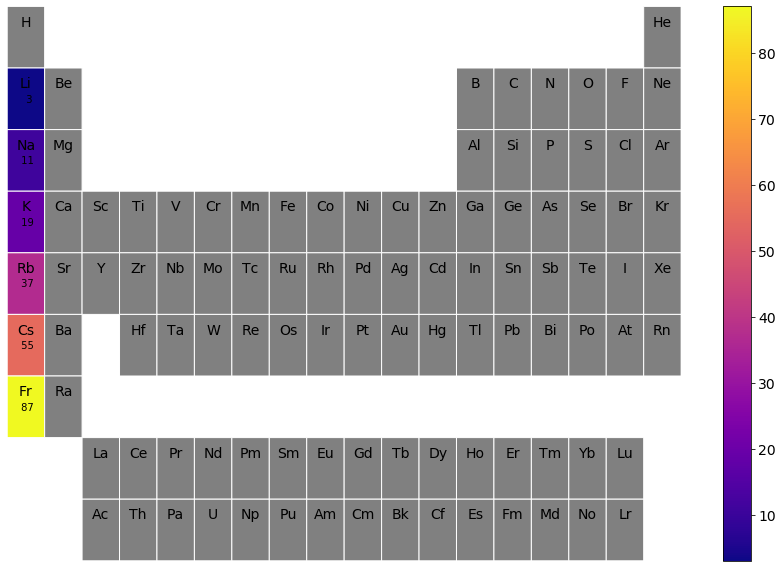

In [ ]:
from pymatgen.ext.matproj import MPRester
import pandas as pd

from pymatgen.core.periodic_table import Specie
from pymatgen.util.plotting import periodic_table_heatmap
print(mg.Element('Li').Z)
data = {
    'Li': mg.Element('Li').Z,
    'Na': mg.Element('Na').Z,
    'K': mg.Element('K').Z,
    'Rb': mg.Element('Rb').Z,
    'Cs': mg.Element('Cs').Z,
    'Fr': mg.Element('Fr').Z
}

plt = periodic_table_heatmap(data, cmap="plasma", value_format="%3i")